In [1]:
# coding: utf-8 (python 3.10.12)
# Author: Ping-Yen Chung

In [2]:
'''Install the required package for loading public data from google drive file'''
#!pip install gdown
import gdown
import pandas as pd

# Load data

In [3]:
'''create a function to load data from google drive file'''

def load_data(file_ids, file_names):
  for file_id, file_name in zip(file_ids, file_names):
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, file_name)

    key = file_name.split('.')[0]
    globals()[key] = pd.read_csv(f'/content/{file_name}')
    print(f'{file_name} is successfully loaded!')


In [4]:
'''load data using the load_data function'''

file_ids = ['1RIq8aKYSxSS-rjb9ZRbRRJPzQfhN33ql', '1Q8cN9Cg2aTlbCg9-wwwRoGyKbk8OFQpo']
file_names = ['test.csv', 'train.csv']

load_data(file_ids, file_names)

Downloading...
From: https://drive.google.com/uc?id=1RIq8aKYSxSS-rjb9ZRbRRJPzQfhN33ql
To: /content/test.csv
100%|██████████| 8.09M/8.09M [00:00<00:00, 81.4MB/s]


test.csv is successfully loaded!


Downloading...
From: https://drive.google.com/uc?id=1Q8cN9Cg2aTlbCg9-wwwRoGyKbk8OFQpo
To: /content/train.csv
100%|██████████| 12.4M/12.4M [00:00<00:00, 81.3MB/s]


train.csv is successfully loaded!


# Check data

In [5]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


# Summarize data to see whether it requires cleaning

### check missing values

In [7]:
'''function for checking missing values'''

import matplotlib.pyplot as plt

def check_missing(df):
  missing = df.isnull().sum()

  if missing.sum() == 0:
    print('No missing values!')
  else:
    plt.figure(figsize=(12, 8))
    graph = missing.plot(kind='bar')
    graph.set_ylim(0, missing.max()+1)
    graph.yaxis.get_major_locator().set_params(integer=True)
    plt.title('Missing Values for Each Column')
    plt.xlabel('Column')
    plt.ylabel('Number of Missing Values')
    plt.show()

In [8]:
check_missing(train)

No missing values!


In [9]:
check_missing(test)

No missing values!


* No missing values appear in the dataset

### Check whether there are people who have an age of less than 0 or over 100 (indicates wrong records)

In [10]:
train[(train['Age'] > 100) | (train['Age'] < 0)]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [11]:
test[(test['Age'] > 100) | (test['Age'] < 0)]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


* No wrong records in column "Age"

### Check whether there are people who have values other than 0 and 1 in columns "HasCrCard" or "IsActiveMember" (indicates wrong records)

In [12]:
train[['HasCrCard','IsActiveMember']].value_counts()

HasCrCard  IsActiveMember
1.0        0.0               63239
           1.0               61189
0.0        1.0               20960
           0.0               19646
Name: count, dtype: int64

In [13]:
test[['HasCrCard','IsActiveMember']].value_counts()

HasCrCard  IsActiveMember
1.0        0.0               42468
           1.0               40384
0.0        1.0               14103
           0.0               13068
Name: count, dtype: int64

* There are no incorrect records in either the 'HasCrCard' column or the 'IsActiveMember' column.

### Check whether there are people who have weird values in column "Geography" or "Gender" (indicates wrong records)

In [14]:
train['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [15]:
train['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [16]:
test['Geography'].value_counts()

Geography
France     63171
Spain      23913
Germany    22939
Name: count, dtype: int64

In [17]:
test['Gender'].value_counts()

Gender
Male      61942
Female    48081
Name: count, dtype: int64

* No wrong records either in column "Geography" or in column "Gender"

### Check whether there are people who have an estimated salary less than 0 (indicates wrong records)

In [18]:
train[train['EstimatedSalary'] < 0]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [19]:
test[test['EstimatedSalary'] < 0]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


* No wrong records in column "EstimatedSalary"

# Since there are no wrong or weird records in both the train and test dataset, we can start with data preprocessing

check the distribution of category

<Axes: ylabel='count'>

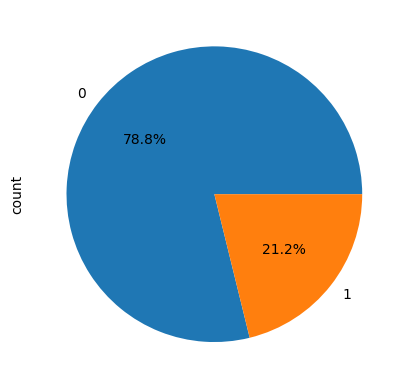

In [20]:
train['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%')

* It seems like there is a problem of unbalanced data in the training dataset, so steps of balancing data are required

In [21]:
x = train.drop(['Exited', 'id', 'CustomerId', 'Surname'], axis=1)
y = train['Exited']

In [22]:
'''Encode non-float value to allow for KNN and SVM machine learning'''

from sklearn.preprocessing import LabelEncoder

labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
x['Geography'] = labelencoder1.fit_transform(x['Geography'])
x['Gender'] = labelencoder2.fit_transform(x['Gender'])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03


Since the values in columns "Balance" and "EstimatedSalary" are widely distributed, it is suggested to make them within 0 to 1

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x

array([[0.636     , 0.        , 1.        , ..., 1.        , 0.        ,
        0.9072786 ],
       [0.554     , 0.        , 1.        , ..., 1.        , 1.        ,
        0.24748323],
       [0.656     , 0.        , 1.        , ..., 1.        , 0.        ,
        0.92436383],
       ...,
       [0.43      , 0.        , 1.        , ..., 1.        , 1.        ,
        0.63715075],
       [0.408     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.35584123],
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.30788045]])

Split the dataset into training and validation set

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

As previously stated, there is a problem of unbalanced data, let's use oversample to balance the training data

In [25]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(random_state=42)
x_train, y_train = ROS.fit_resample(x_train, y_train)

<Axes: ylabel='count'>

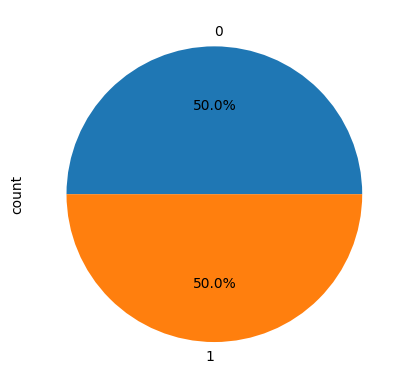

In [26]:
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%')

* The data is successfully balanced

# After data preprocessing, let's build predictive models using different methods (and record each method's performance).

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

results = {}

KNN method

In [28]:
from sklearn.neighbors import KNeighborsClassifier

def train_test_knn(x_train, y_train, x_val, y_val):
  param_grid = {'n_neighbors': [3, 7, 11],
          'weights': ['uniform', 'distance']}
  knn = KNeighborsClassifier()
  grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='f1')
  grid_search.fit(x_train, y_train)
  best_knn = grid_search.best_estimator_
  y_val_pred = best_knn.predict(x_val)
  f1 = f1_score(y_val, y_val_pred)
  accuracy = accuracy_score(y_val, y_val_pred)
  conf_matrix = confusion_matrix(y_val, y_val_pred)
  return {'model': 'KNN', 'best_model': best_knn, 'f1': f1, 'accuracy': accuracy, 'conf_matrix': conf_matrix}

results['KNN'] = train_test_knn(x_train, y_train, x_val, y_val)

In [29]:
results['KNN']

{'model': 'KNN',
 'best_model': KNeighborsClassifier(n_neighbors=3, weights='distance'),
 'f1': 0.5591177534048452,
 'accuracy': 0.7783500469597359,
 'conf_matrix': array([[21052,  5000],
        [ 2316,  4639]])}

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

def train_test_logistic_regression(x_train, y_train, x_val, y_val):
  param_grid = {'C': [0.1, 10, 1000],
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear', 'saga']}

  log_reg = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')
  grid_search = GridSearchCV(log_reg, param_grid, cv=10, scoring='f1')
  grid_search.fit(x_train, y_train)
  best_log_reg = grid_search.best_estimator_
  y_val_pred = best_log_reg.predict(x_val)
  f1 = f1_score(y_val, y_val_pred)
  accuracy = accuracy_score(y_val, y_val_pred)
  conf_matrix = confusion_matrix(y_val, y_val_pred)
  return {'model': 'Logistic Regression', 'best_model': best_log_reg, 'f1': f1, 'accuracy': accuracy, 'conf_matrix': conf_matrix}


results['Logistic Regression'] = train_test_logistic_regression(x_train, y_train, x_val, y_val)

In [31]:
results['Logistic Regression']

{'model': 'Logistic Regression',
 'best_model': LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                    random_state=42, solver='liblinear'),
 'f1': 0.5483853806458477,
 'accuracy': 0.7428121307601417,
 'conf_matrix': array([[19364,  6688],
        [ 1801,  5154]])}

XGBoost method

In [32]:
from xgboost import XGBClassifier

def train_test_xgb(x_train, y_train, x_val, y_val):
  param_grid = {'n_estimators': [10, 100, 500],
          'learning_rate': [0.01, 0.1]}
  xgb = XGBClassifier(random_state=42)
  grid_search = GridSearchCV(xgb, param_grid, cv=10, scoring='f1')
  grid_search.fit(x_train, y_train)
  best_xgb = grid_search.best_estimator_
  y_val_pred = best_xgb.predict(x_val)
  f1 = f1_score(y_val, y_val_pred)
  accuracy = accuracy_score(y_val, y_val_pred)
  conf_matrix = confusion_matrix(y_val, y_val_pred)
  return {'model': 'XGBoost', 'best_model': best_xgb, 'f1': f1, 'accuracy': accuracy, 'conf_matrix': conf_matrix}

results['XGBoost'] = train_test_xgb(x_train, y_train, x_val, y_val)

In [33]:
results['XGBoost']

{'model': 'XGBoost',
 'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=500, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...),
 'f1': 0.6463832601767783,
 'accuracy': 0.8218256733420184,
 'conf_matrix': array([[21751,  4301],
        [ 1580,  5375]])}

# Utilizing Deep Learning to build the predictive model

In [34]:
x_train.shape

(208122, 10)

Epoch 1/100
4163/4163 [==============================] - 20s 4ms/step - loss: 0.4599 - accuracy: 0.7848 - f1_m: 0.7827 - val_loss: 0.4645 - val_accuracy: 0.7722 - val_f1_m: 0.5948
Epoch 2/100
4163/4163 [==============================] - 15s 4ms/step - loss: 0.4440 - accuracy: 0.7945 - f1_m: 0.7916 - val_loss: 0.5275 - val_accuracy: 0.7520 - val_f1_m: 0.5796
Epoch 3/100
4163/4163 [==============================] - 15s 4ms/step - loss: 0.4397 - accuracy: 0.7965 - f1_m: 0.7935 - val_loss: 0.6118 - val_accuracy: 0.6899 - val_f1_m: 0.5442
Epoch 4/100
4163/4163 [==============================] - 13s 3ms/step - loss: 0.4386 - accuracy: 0.7975 - f1_m: 0.7946 - val_loss: 0.3794 - val_accuracy: 0.8311 - val_f1_m: 0.6282
Epoch 5/100
4163/4163 [==============================] - 14s 3ms/step - loss: 0.4371 - accuracy: 0.7982 - f1_m: 0.7952 - val_loss: 0.3479 - val_accuracy: 0.8520 - val_f1_m: 0.6430
Epoch 6/100
4163/4163 [==============================] - 15s 4ms/step - loss: 0.4366 - accuracy: 0.7

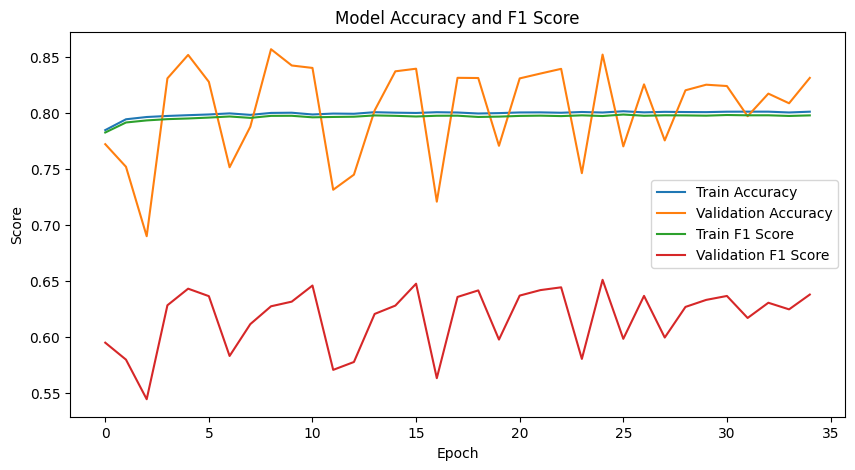

1032/1032 [==============================] - 2s 2ms/step


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from tensorflow.keras import backend as K

class LossHistory(Callback):
  def on_train_begin(self, logs=None):
    self.total_batches = 0
    self.losses = []
    self.val_losses = []
    self.iterations = []
    self.accuracy = []
    self.val_accuracy = []
    self.f1 = []
    self.val_f1 = []

  def on_batch_end(self, batch, logs=None):
    self.total_batches += 1
    if self.total_batches % 100 == 0:
      self.losses.append(logs.get('loss'))
      self.iterations.append(self.total_batches)

  def on_epoch_end(self, epoch, logs=None):
    self.val_losses.append(logs.get('val_loss'))
    self.accuracy.append(logs.get('accuracy'))
    self.val_accuracy.append(logs.get('val_accuracy'))
    self.f1.append(logs.get('f1_m'))
    self.val_f1.append(logs.get('val_f1_m'))

def f1_m(y_true, y_pred):
  def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives+K.epsilon())
    return recall

  def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives+K.epsilon())
    return precision

  precision = precision_m(y_true, y_pred)
  recall = recall_m(y_true, y_pred)
  return 2 * ((precision*recall) / (precision+recall+K.epsilon()))

history = LossHistory()

DLmodel = Sequential([
    Dense(16, activation='relu'),
    BatchNormalization(momentum=0.01),
    Dense(4, activation='relu'),
    BatchNormalization(momentum=0.01),
    Dense(1, activation='sigmoid')
])

learning_rate = 0.01
DLmodel.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy', f1_m])
early_stopping = EarlyStopping(monitor='val_f1_m', mode='max', patience=10, restore_best_weights=True)
history = LossHistory()
DLmodel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=50, callbacks=[history, early_stopping])

'''Accuracy'''
plt.figure(figsize=(10, 5))
plt.plot(history.accuracy, label='Train Accuracy')
plt.plot(history.val_accuracy, label='Validation Accuracy')
plt.plot(history.f1, label='Train F1 Score')
plt.plot(history.val_f1, label='Validation F1 Score')
plt.title('Model Accuracy and F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.show()

'''Confusion Matrix'''
y_pred = DLmodel.predict(x_val)
y_pred_classes = (y_pred > 0.5).astype(int)
DLconf_matrix = confusion_matrix(y_val, y_pred_classes)

'''F1 Score'''
DLf1 = f1_score(y_val, y_pred_classes)
DLaccuracy = accuracy_score(y_val, y_pred_classes)

results['Deep Learning'] = {
    'model': 'Deep Learning',
    'best_model': DLmodel,
    'f1': DLf1,
    'accuracy':DLaccuracy,
    'conf_matrix': DLconf_matrix
    }

# See the best result of each method

In [52]:
import seaborn as sns

models = list(results.keys())

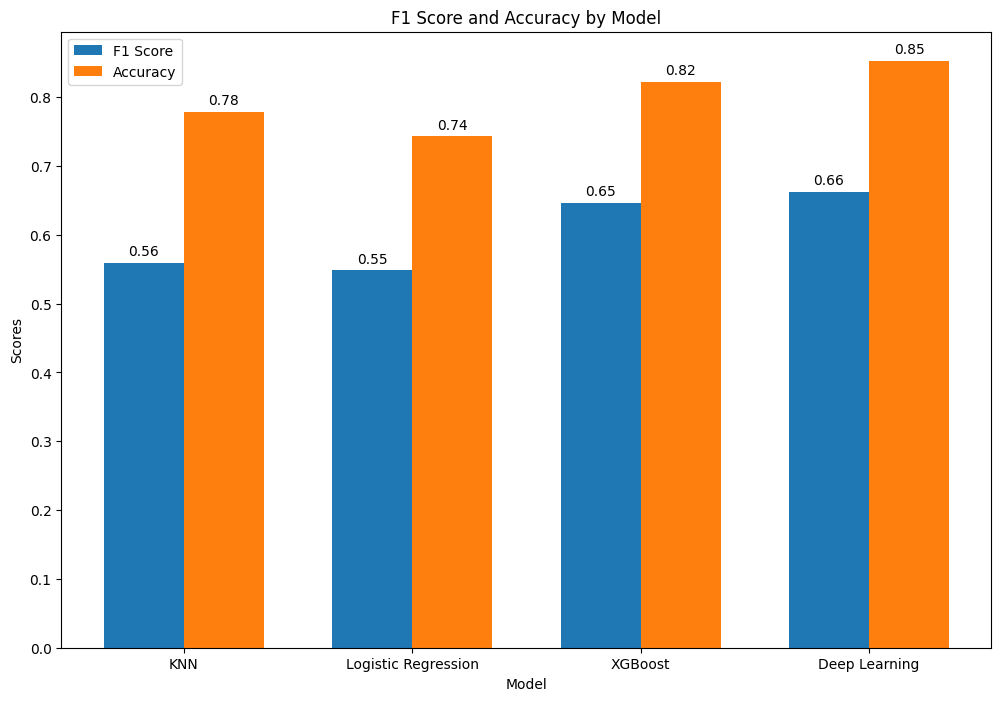

In [53]:
f1_scores = [results[model]['f1'] for model in models]
accuracies = [results[model]['accuracy'] for model in models]

x = range(len(models))
width = 0.35

fig, graph = plt.subplots(figsize=(12, 8))
bar1 = graph.bar(x, f1_scores, width, label='F1 Score')
bar2 = graph.bar([i + width for i in x], accuracies, width, label='Accuracy')

graph.set_xlabel('Model')
graph.set_ylabel('Scores')
graph.set_title('F1 Score and Accuracy by Model')
graph.set_xticks([i + width / 2 for i in x])
graph.set_xticklabels(models)
graph.legend()

for bar in bar1 + bar2:
  height = bar.get_height()
  graph.annotate(f'{height:.2f}',
          xy=(bar.get_x()+bar.get_width()/2, height),
          xytext=(0, 3),
          textcoords="offset points",
          ha='center',
          va='bottom')

plt.show()

* Deep learning method helped us get the best result of 84% prediction accuracy, with 66% f1 score

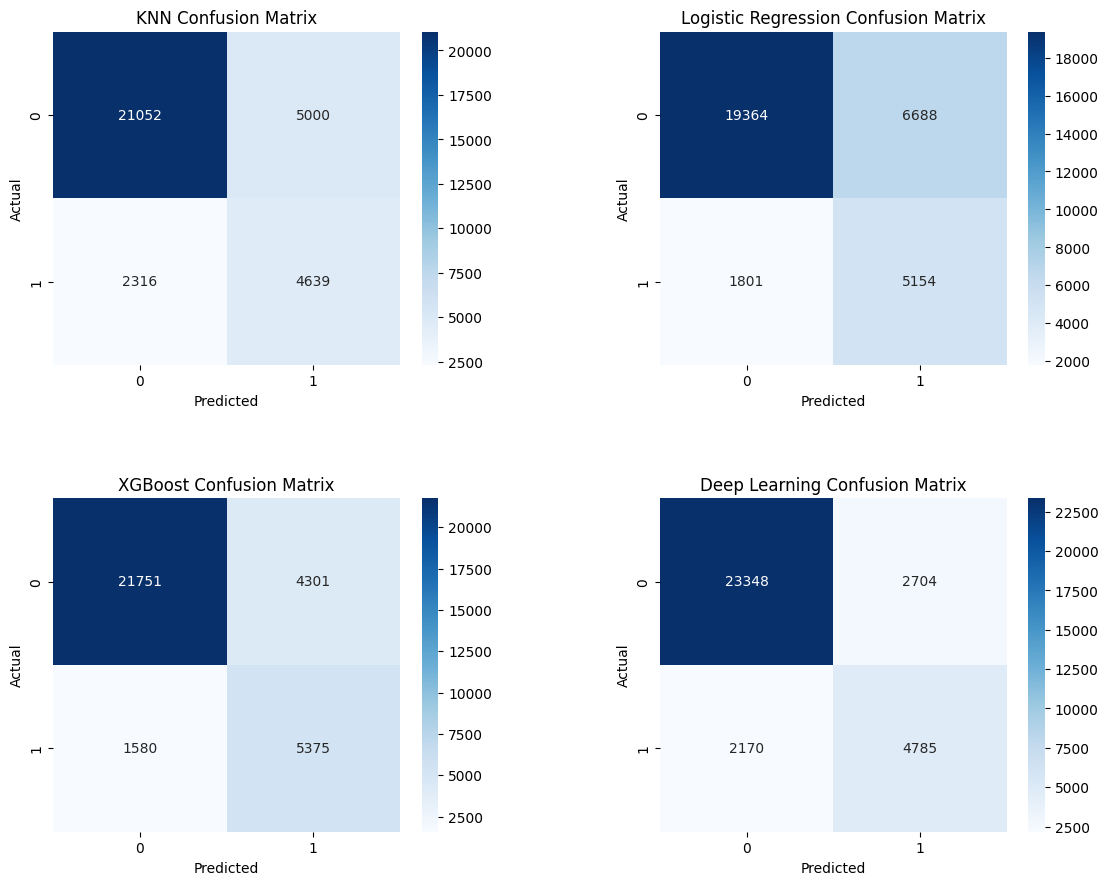

In [54]:
plt.figure(figsize=(13, 10))

for i, model in enumerate(models):
  conf_matrix = results[model]['conf_matrix']
  plt.subplot(2, 2, i+1)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title(f'{model} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

* While XGBoost performed better in forecasting 1 than Deep learning did, it performed worse in forecasting 0

1032/1032 [==============================] - 2s 2ms/step


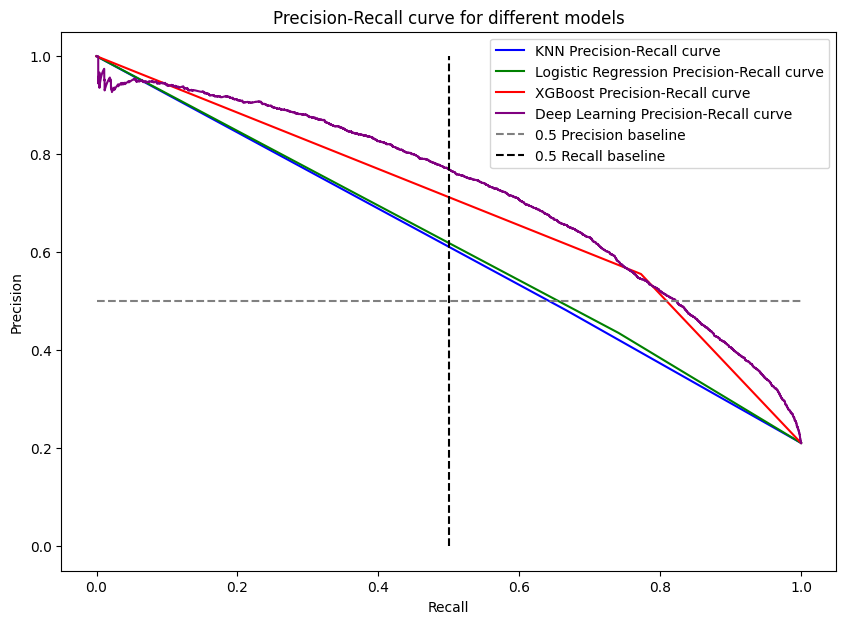

In [55]:
from sklearn.metrics import precision_recall_curve

Models = [results[model]['best_model'] for model in models]
model_names = [model for model in models]
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(10, 7))

for model, color, model_name in zip(Models, colors, model_names):
  precisions, recalls, _ = precision_recall_curve(y_val, model.predict(x_val).ravel())
  ax.plot(recalls, precisions, color=color, label=f'{model_name} Precision-Recall curve')

ax.plot([0, 1], [0.5, 0.5], linestyle='--', color='grey', label='0.5 Precision baseline')
ax.plot([0.5, 0.5], [0, 1], linestyle='--', color='black', label='0.5 Recall baseline')

ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall curve for different models')
plt.show()

Deep Learning's result shows high precision as well as recall, indicating this method is the most robust one

# Make prediction using different models and save the results to a CSV file

In [56]:
from sklearn.metrics import precision_score, recall_score

df = pd.DataFrame(test)
model_performance = []
Test = test.iloc[:,3:].copy()
Test['Geography'] = labelencoder1.fit_transform(Test['Geography'])
Test['Gender'] = labelencoder2.fit_transform(Test['Gender'])
scaler1 = MinMaxScaler()
Test = scaler1.fit_transform(Test)


for model_name, model_data in results.items():
  model = model_data['best_model']

  if hasattr(model, 'predict_proba'):
    probabilities = model.predict_proba(Test)[:, 1]
    predictions = model.predict(Test)
    df[f'{model_name} Predictions'] = predictions
    df[f'{model_name} Probabilities of being 1'] = probabilities
    val_predictions = model.predict(x_val)
    accuracy = results[model_name]['accuracy']
    f1 = results[model_name]['f1']
    precision = precision_score(y_val, val_predictions)
    recall = recall_score(y_val, val_predictions)
    conf_matrix = confusion_matrix(y_val, val_predictions)
    model_performance.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix
        })
  else:
    probabilities = model.predict(Test)
    predictions = (probabilities>0.5).astype(int)
    df[f'{model_name} Predictions'] = predictions
    df[f'{model_name} Probabilities of being 1'] = probabilities
    val_predictions = (model.predict(x_val)>0.5).astype(int)
    accuracy = results[model_name]['accuracy']
    f1 = results[model_name]['f1']
    precision = precision_score(y_val, val_predictions)
    recall = recall_score(y_val, val_predictions)
    conf_matrix = confusion_matrix(y_val, val_predictions)
    model_performance.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix
        })

performance_df = pd.DataFrame(model_performance)

combined_df = pd.concat([df, pd.DataFrame([['']*len(df.columns)], columns=df.columns)], ignore_index=True)
performance_df_expanded = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Value')
performance_df_expanded['Index'] = range(len(combined_df), len(combined_df)+len(performance_df_expanded))
combined_df = pd.concat([combined_df, performance_df_expanded.set_index('Index')], axis=0, ignore_index=True)
combined_df.to_csv('Predictions_Performance.csv', index=False)

1032/1032 [==============================] - 2s 2ms/step


# Conclusion:
# Deep Learning gave us the best predictive model on forecasting the status of exit

The below graph shows the distribution of the predictions for the testing dats

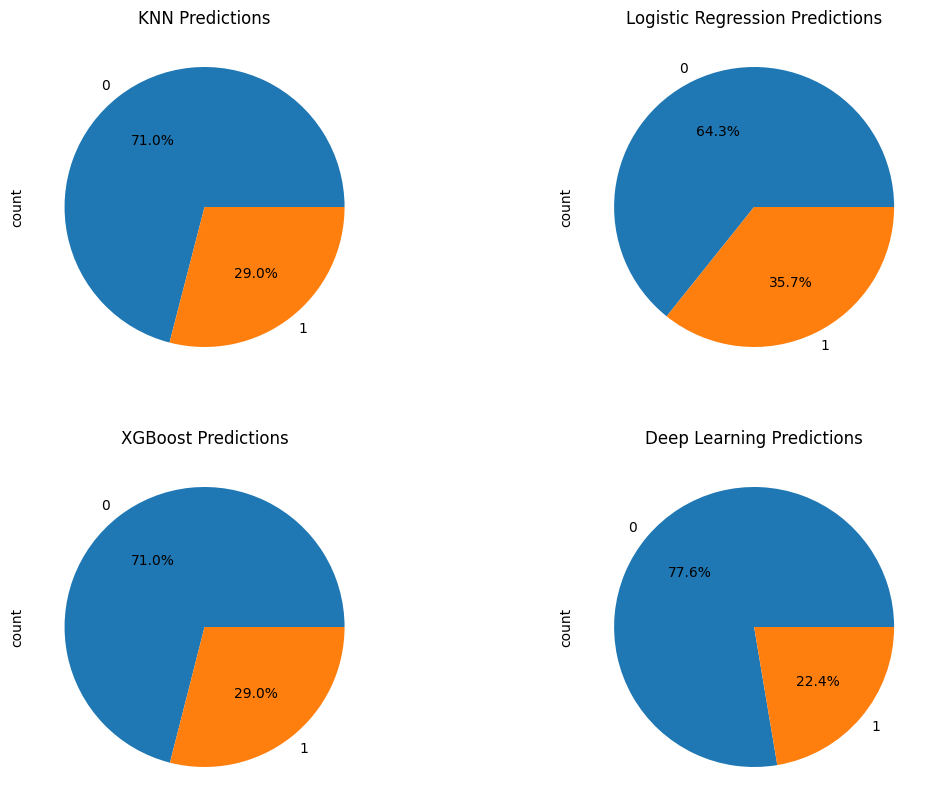

In [57]:
plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
df['KNN Predictions'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('KNN Predictions')
plt.subplot(2, 2, 2)
df['Logistic Regression Predictions'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Logistic Regression Predictions')
plt.subplot(2, 2, 3)
df['XGBoost Predictions'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('XGBoost Predictions')
plt.subplot(2, 2, 4)
df['Deep Learning Predictions'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Deep Learning Predictions')

plt.show()